## What can we learn from a deeper dive into Segal's released data?

Let's start by looking at the distributions that they used.  By using their 50th percentile data and their 65th percentile data, we can reconstruct the mean and standard deviation to look at things a little more granularly.

Additionally, there were a lot of qualifiers thrown around in the hearings.  Let's calculate a few of them:
- Jobs that fall more than 10% below the 50th percentile were listed as the ones that would be focused on first...maybe with a plan worked up by next legislative session.
- Within percentage difference from the benchmark (both the 50th and 65th percentiles), why are we swapping from the percentile target to percentages of target?

In [38]:
## Data Setup

import pandas as pd
import numpy as np
from scipy.stats import norm

# Load data
df = pd.read_csv("full_with_nearest.csv")

# Filter to percentiles 50 and 65
df_filtered = df[df['percentile'].isin([50, 65])]

# Pivot only on common identifier columns (exclude nearest_range and range_change)
index_cols = [
    'benchmark', 'title', 'group', 'code', 'family',
    'BU', 'schedule', 'original_range', 'step', 'ak_annual_salary'
]
df_pivot = df_filtered.pivot_table(
    index=index_cols,
    columns='percentile',
    values='market_target_annual_salary'
).reset_index().rename(columns={50: 'p50', 65: 'p65'})

# Compute mu and sigma (normal distribution assumption)
df_pivot['mu'] = df_pivot['p50']
z65 = norm.ppf(0.65)
df_pivot['sigma'] = (df_pivot['p65'] - df_pivot['p50']) / z65

# Compute percentile score for ak_annual_salary using mu and sigma
df_pivot['ak_percentile'] = norm.cdf(df_pivot['ak_annual_salary'], loc=df_pivot['mu'], scale=df_pivot['sigma'])

# Compute percentage of p50 and p65 for ak_annual_salary
df_pivot['ak_as_percent_of_p50'] = df_pivot.apply(lambda row: row['ak_annual_salary'] / row['p50'], axis=1)
df_pivot['ak_as_percent_of_p65'] = df_pivot.apply(lambda row: row['ak_annual_salary'] / row['p65'], axis=1)

# Compute salary difference between ak_annual_salary and target percentiles
df_pivot['ak_diff_from_p50'] = df_pivot['ak_annual_salary'] - df_pivot['p50']
df_pivot['ak_diff_from_p65'] = df_pivot['ak_annual_salary'] - df_pivot['p65']

# Compute percentile score of 90% and 95% of p50
df_pivot['p50_90pct_percentile'] = norm.cdf(df_pivot['p50'] * 0.9, loc=df_pivot['mu'], scale=df_pivot['sigma'])
df_pivot['p50_95pct_percentile'] = norm.cdf(df_pivot['p50'] * 0.95, loc=df_pivot['mu'], scale=df_pivot['sigma'])

# Compute percentile score of 90% and 95% of p65
df_pivot['p65_90pct_percentile'] = norm.cdf(df_pivot['p65'] * 0.9, loc=df_pivot['mu'], scale=df_pivot['sigma'])
df_pivot['p65_95pct_percentile'] = norm.cdf(df_pivot['p65'] * 0.95, loc=df_pivot['mu'], scale=df_pivot['sigma'])

# Export the updated dataframe
df_pivot.to_csv('methodology_analysis.csv', index=False)
df_pivot.to_parquet('methodology_analysis.parquet', index=False)

df_pivot.head(20) 

/Users/jesseslone/miniconda3/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2071: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/jesseslone/miniconda3/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2071: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/jesseslone/miniconda3/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2071: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/jesseslone/miniconda3/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2071: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/jesseslone/miniconda3/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2071: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


percentile,benchmark,title,group,code,family,BU,schedule,original_range,step,ak_annual_salary,...,sigma,ak_percentile,ak_as_percent_of_p50,ak_as_percent_of_p65,ak_diff_from_p50,ak_diff_from_p65,p50_90pct_percentile,p50_95pct_percentile,p65_90pct_percentile,p65_95pct_percentile
0,1,Division Director ‐ PX,Executives and Senior Administrators,PA0112,PA01 ‐ Executives and Senior Administrators,XE,N00,27.0,A,117371,...,46021.432927,4.014227e-01,0.910834,0.800654,-11490.0,-29223.0,3.897379e-01,0.444330,5.266241e-01,0.589420
1,1,Division Director ‐ PX,Executives and Senior Administrators,PA0112,PA01 ‐ Executives and Senior Administrators,XE,N00,27.0,F,140166,...,11284.113820,1.799203e-02,0.855558,0.833438,-23664.0,-28012.0,7.326970e-02,0.233940,1.345634e-01,0.359469
2,1,Division Director ‐ PX,Executives and Senior Administrators,PA0112,PA01 ‐ Executives and Senior Administrators,XE,N00,27.0,O,169806,...,30917.122340,2.618540e-01,0.895979,0.842990,-19714.0,-31627.0,2.699403e-01,0.379613,3.950406e-01,0.523746
3,2,Division Operations Manager,Executives and Senior Administrators,PA0113,PA01 ‐ Executives and Senior Administrators,SS,200,24.0,A,108867,...,20349.295414,6.243087e-01,1.062947,0.987357,6447.0,-1394.0,3.073732e-01,0.400654,4.378110e-01,0.545539
4,2,Division Operations Manager,Executives and Senior Administrators,PA0113,PA01 ‐ Executives and Senior Administrators,SS,200,24.0,E,124654,...,20938.415432,5.517925e-01,1.022357,0.958906,2726.0,-5342.0,2.801765e-01,0.385465,4.068992e-01,0.529851
5,2,Division Operations Manager,Executives and Senior Administrators,PA0113,PA01 ‐ Executives and Senior Administrators,SS,200,24.0,O,151029,...,11958.876836,5.375738e-01,1.007525,0.977477,1128.0,-3480.0,1.050173e-01,0.265416,1.822875e-01,0.397169
6,3,Office Assistant 1,Administrative and Office Support,PB0102,PB01 ‐ General Administration,GP,200,8.0,A,34983,...,10596.374592,3.487075e-01,0.894637,0.810054,-4120.0,-8203.0,3.560555e-01,0.426806,4.911306e-01,0.572029
7,3,Office Assistant 1,Administrative and Office Support,PB0102,PB01 ‐ General Administration,GP,200,8.0,F,40560,...,8997.705293,2.751287e-01,0.882987,0.821019,-5375.0,-8842.0,3.048439e-01,0.399261,4.349716e-01,0.544111
8,3,Office Assistant 1,Administrative and Office Support,PB0102,PB01 ‐ General Administration,GP,200,8.0,O,51285,...,6184.462565,3.546226e-01,0.956970,0.916229,-2306.0,-4689.0,1.930963e-01,0.332409,3.016175e-01,0.473205
9,4,Secretary,Administrative and Office Support,PB0130,PB01 ‐ General Administration,XE,N00,11.0,A,43115,...,10264.183569,1.693531e-01,0.814489,0.757866,-9820.0,-13775.0,3.030231e-01,0.398256,4.329231e-01,0.543078


### Data Dictionary
#### Original Dataset (`df`)

| Column Name | Description |
| --- | --- |
| benchmark | Sequential identifier used by Segal to index job classifications (not analytically meaningful on its own). |
| title | Job title for the position. |
| group | Occupational group (e.g., Administrative and Office Support). |
| code | Job class code, a unique identifier for the position (e.g., PB0152). |
| family | Job family grouping (e.g., PB01 ‐ General Administration). |
| BU | Business Unit code representing salary classification and bargaining unit. Examples include: GP, XE, SS. |
| schedule | Specific salary schedule assigned to the job (e.g., 200 for Anchorage-based schedules; others indicate strike classes or special duty pay). |
| original_range | The pay range to which the job class is currently assigned. |
| step | Step within the range, representing time-based progression in pay (e.g., A = entry, E/F = midpoint, O = max). |
| ak_annual_salary | Actual Alaska annual salary for this job at the specified range and step. |
| market_target_annual_salary | Segal’s market salary target for this role at the given percentile (e.g., 50th or 65th percentile). |
| percentile | Market comparison level used (either 50 or 65, depending on which dataset slice the row belongs to). |
| nearest_range | Range from the salary schedule that most closely aligns with the market target salary. |
| range_change | Numeric change in ranges required to bring the position into alignment with the market target (positive = increase, negative = decrease). |


#### Derived Dataset (`df_pivot`)

| Column Name | Description |
| --- | --- |
| benchmark | Sequential identifier used by Segal to index job classifications (not analytically meaningful on its own). |
| title | Job title for the position. |
| group | Occupational group (e.g., Administrative and Office Support). |
| code | Job class code, a unique identifier for the position (e.g., PB0152). |
| family | Job family grouping (e.g., PB01 ‐ General Administration). |
| BU | Business Unit code representing salary classification and bargaining unit. Examples include: GP, XE, SS. |
| schedule | Specific salary schedule assigned to the job (e.g., 200 for Anchorage-based schedules; others indicate strike classes or special duty pay). |
| original_range | The pay range to which the job class is currently assigned. |
| step | Step within the range, representing time-based progression in pay (e.g., A = entry, E/F = midpoint, O = max). |
| ak_annual_salary | Actual Alaska annual salary for this job at the specified range and step. |
| p50 | Segal’s market salary target for this role at the 50th percentile. |
| p65 | Segal’s market salary target for this role at the 65th percentile. |
| mu | Mean of assumed normal distribution, equal to `p50`. |
| sigma | Standard deviation of assumed normal distribution. |
| ak_percentile | Percentile score for `ak_annual_salary` based on assumed normal distribution. |
| ak_as_percent_of_p50 | `ak_annual_salary` as a percentage of `p50`. |
| ak_as_percent_of_p65 | `ak_annual_salary` as a percentage of `p65`. |
| ak_diff_from_p50 | Difference between `ak_annual_salary` and `p50`. |
| ak_diff_from_p65 | Difference between `ak_annual_salary` and `p65`. |
| p50_90pct_percentile | Percentile score for 90% of `p50`. |
| p50_95pct_percentile | Percentile score for 95% of `p50`. |
| p65_90pct_percentile | Percentile score for 90% of `p65`. |
| p65_95pct_percentile | Percentile score for 95% of `p65`. |

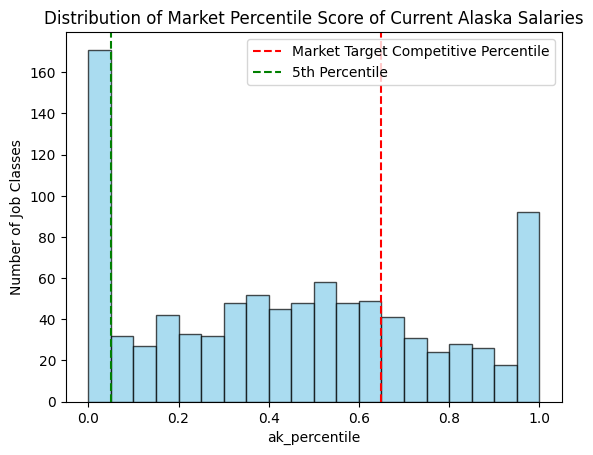

Percentage of salaries below 5th percentile: 16.33%


In [39]:
import matplotlib.pyplot as plt

# Define percentile value and label
percentile_value = 0.65
label = 'Market Target Competitive Percentile'

# Calculate percentage of salaries in bottom 5% of market pay
bottom_5_percent = df_pivot['ak_percentile'].quantile(0.05)
percent_below_5th_percentile = (df_pivot['ak_percentile'] < 0.05).mean() * 100

# Plot histogram of ak_percentile
plt.hist(df_pivot['ak_percentile'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=percentile_value, color='red', linestyle='dashed', label=label)
plt.axvline(x=0.05, color='green', linestyle='dashed', label='5th Percentile')
plt.title('Distribution of Market Percentile Score of Current Alaska Salaries')
plt.xlabel('ak_percentile')
plt.ylabel('Number of Job Classes')
plt.legend()
plt.show()

print(f'Percentage of salaries below 5th percentile: {percent_below_5th_percentile:.2f}%')

In [40]:
# Filter data where ak_as_percent_of_p50 is less than 0.9
df_filtered = df_pivot[df_pivot['ak_as_percent_of_p50'] < 0.9]

# Calculate summary statistics for multiple columns
summary_stats = df_filtered[['p50_90pct_percentile', 'p50_95pct_percentile', 'p65_95pct_percentile']].describe()

# Apply formatting to the output
print(summary_stats.to_string(formatters={'p50_90pct_percentile': lambda x: f"{x:.6f}",
                                          'p50_95pct_percentile': lambda x: f"{x:.6f}",
                                          'p65_95pct_percentile': lambda x: f"{x:.6f}"}))

percentile p50_90pct_percentile p50_95pct_percentile p65_95pct_percentile
count                216.000000           216.000000           216.000000
mean                   0.151180             0.245316             0.350908
std                    0.139560             0.155547             0.205155
min                    0.000000             0.000000             0.000000
25%                    0.004747             0.097340             0.175977
50%                    0.123004             0.280920             0.415247
75%                    0.281533             0.386234             0.530651
max                    0.439845             0.469836             0.614234


Here’s a **quick‐read** of what these summary statistics tell us about how far “within 90 % or 95 % of the market targets” actually sit in the market distribution:

| Statistic    | p50_90pct_percentile                                 | p50_95pct_percentile                                 | p65_95pct_percentile                                 |
|:------------:|:-----------------------------------------------------:|:-----------------------------------------------------:|:-----------------------------------------------------:|
| **What it measures** | Percentile rank of 0.90 × p50                         | Percentile rank of 0.95 × p50                         | Percentile rank of 0.95 × p65                         |
| **Count**    | 216 job/step observations                              | 216                                                   | 216                                                   |
| **Mean**     | 15 %                                                   | 25 %                                                   | 35 %                                                   |
| **Std dev**  | 14 pp                                                  | 16 pp                                                  | 21 pp                                                  |
| **Min**      | 0 %                                                    | 0 %                                                    | 0 %                                                    |
| **25th pct** | 0.5 %                                                  | 9.7 %                                                  | 17.6 %                                                 |
| **50th pct** | 12.3 %                                                 | 28.1 %                                                 | 41.5 %                                                 |
| **75th pct** | 28.2 %                                                 | 38.6 %                                                 | 53.1 %                                                 |
| **Max**      | 43.9 %                                                 | 47.0 %                                                 | 61.4 %                                                 |

---

### How to read this

- **p50_90pct_percentile**  
  For each job, take 90 % of its market‐midpoint (p50), then ask “what percentile is that in Segal’s assumed normal curve?”  
  - *Median answer:* **12.3th percentile** (half of these jobs sit at or below the 12th percentile when you shave 10 % off p50).

- **p50_95pct_percentile**  
  Same exercise at 95 % of p50.  
  - *Median answer:* **28.1th percentile**.

- **p65_95pct_percentile**  
  Now compare 95 % of the Legislature’s **65th percentile** target.  
  - *Median answer:* **41.5th percentile**—so half of all roles still sit **below the 42nd percentile**, despite being “only 5 % under” the p65 target.

---

### Key takeaways

1. **Even a tiny “within 5 %” rule puts you well below mid‐market**  
   - Cutting to 95 % of the *statutory* 65th percentile target still leaves half of the jobs at or below the **41st percentile**.

2. **Percent‐of‐target rules mask huge rank shifts**  
   - A flat 5 % or 10 % pay reduction sounds small, but on a normal curve it can slice off **30–50 percentile points** of competitive position.

3. **Legislative intent vs. administrative practice**  
   - The law says “65th percentile.” In practice, “within 90 % of midpoint” often means “we’ll ignore the bottom 80 % of the market.”

> **Whenever you hear “within X % of market,” ask:  
> “What *actual percentile* does that buy me?”**  